# KNN Classifier with sklearn

Using Breast Cancer Wisconsin (Diagnostic) Database to create a KNN classifier.

## Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
# Print the data set description
# print(cancer.DESCR)

## Explore

In [3]:
# scikit-learn Bunch object is similar to a dictionary.
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# Number of features of the dataset 
len(cancer['feature_names'])

30

In [5]:
# Convert the sklearn.dataset to a DataFrame
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df = cancer_df.astype('float64')

print('Shape: ', cancer_df.shape)
print('Index: ', cancer_df.index)

Shape:  (569, 31)
Index:  RangeIndex(start=0, stop=569, step=1)


In [6]:
# class distribution of dataset
target_series = pd.Series(name='target', index=['malignant', 'benign'], dtype='int64')

target_series.loc['malignant'] = int(sum(cancer_df['target']==0))
target_series.loc['benign'] = int(sum(cancer_df['target']==1))

target_series.astype(int)

malignant    212
benign       357
Name: target, dtype: int64

## Data

In [7]:
# Split the DataFrame into X (the data) and y (the labels)
X = cancer_df.iloc[:, 0:-1]
y = cancer_df['target']

print('X: ', X.shape)
print('y: ', y.shape)

X:  (569, 30)
y:  (569,)


In [8]:
# Using train_test_split, split X and y into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_train: ', y_test.shape)

X_train:  (426, 30)
X_test:  (143, 30)
y_train:  (426,)
y_train:  (143,)


## K-Nearest Neighbors (KNN) Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors=1)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
# score (mean accuracy) of the classifier
knnModel.score(X_test, y_test)

0.916083916083916

In [11]:
# mean value for each feature, ignores the target column
means = cancer_df.mean()[:-1].values.reshape(1, -1)

# prediction for the class label using the mean value for each feature.
knnModel.predict(means)

array([1.])

## Plot model accuracy

Visualization of the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
def plot_accuracy(knnModel, X_train, y_train, X_test, y_test):
    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    scores = [knnModel.score(mal_train_X, mal_train_y), knnModel.score(ben_train_X, ben_train_y), 
              knnModel.score(mal_test_X, mal_test_y), knnModel.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<IPython.core.display.Javascript object>


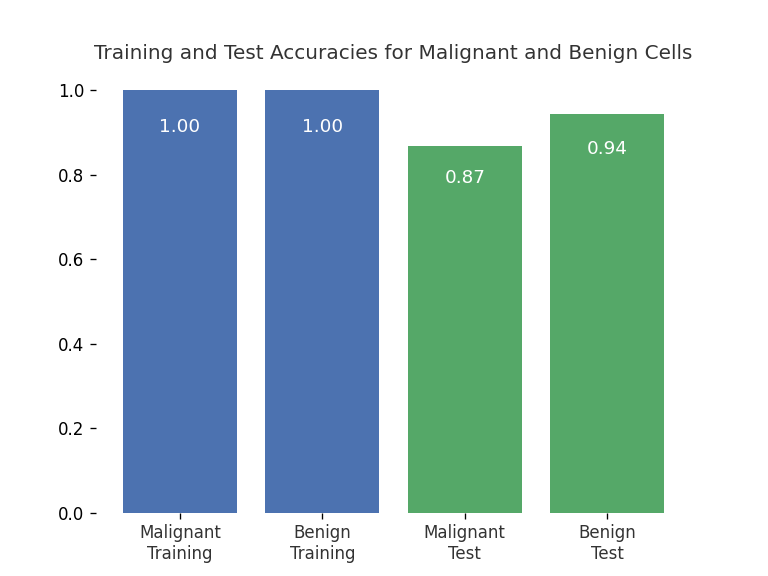

In [14]:
plot_accuracy(knnModel, X_train, y_train, X_test, y_test)